In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv("datasets/lsa64_dataset_openpose.csv")

In [3]:
df

,Unnamed: 0,category,video_name,frame,hand_0_0_x,hand_0_0_y,hand_0_0_z,hand_0_1_x,hand_0_1_y,hand_0_1_z,...,pose_22_y,pose_22_z,pose_23_x,pose_23_y,pose_23_z,pose_24_x,pose_24_y,pose_24_z,missing_hand,missing_face
0,0,1,001_001_001.mp4,0,0.559302,0.943834,0.361916,0.539392,0.984436,0.072649,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False
1,1,1,001_001_001.mp4,1,0.557995,0.944853,0.363025,0.538670,0.990662,0.072256,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False
2,2,1,001_001_001.mp4,2,0.557992,0.945950,0.366478,0.539255,0.989671,0.074984,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False
3,3,1,001_001_001.mp4,3,0.557876,0.945462,0.389607,0.538725,0.984666,0.079201,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False
4,4,1,001_001_001.mp4,4,0.557848,0.945605,0.395565,0.538737,0.980610,0.080987,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408895,6225,9,009_010_005.mp4,113,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False
408896,6226,9,009_010_005.mp4,114,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False
408897,6227,9,009_010_005.mp4,115,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False
408898,6228,9,009_010_005.mp4,116,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False


<Axes: >

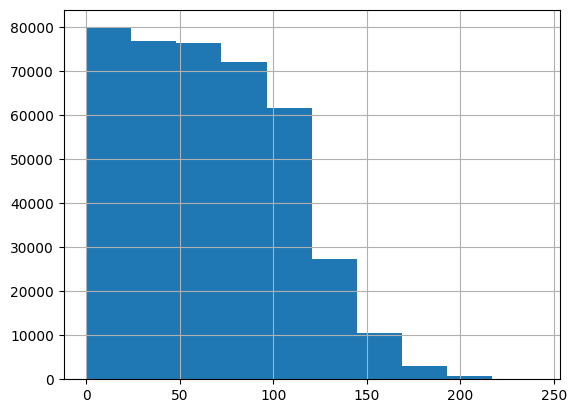

In [4]:
df["frame"].hist()

In [5]:
df.groupby("video_name")["frame"].max().min()

57

In [6]:
target_frames = 40

In [7]:
df_new_fps = pd.DataFrame(columns=df.columns)
for video_name in df["video_name"].unique():
    df_video = df[df["video_name"] == video_name]
    video_frames = df_video["frame"].max()
    frames_diff = video_frames - target_frames
    frames_to_remove = [i for i in range(0, video_frames, video_frames//(video_frames-target_frames))]
    frames_to_remove = frames_to_remove[(len(frames_to_remove) - frames_diff - 1):]
    new_df = df_video[~df_video["frame"].isin(frames_to_remove)]
    df_new_fps = pd.concat([df_new_fps, new_df])

In [8]:
df_new_fps

,Unnamed: 0,category,video_name,frame,hand_0_0_x,hand_0_0_y,hand_0_0_z,hand_0_1_x,hand_0_1_y,hand_0_1_z,...,pose_22_y,pose_22_z,pose_23_x,pose_23_y,pose_23_z,pose_24_x,pose_24_y,pose_24_z,missing_hand,missing_face
0,0,1,001_001_001.mp4,0,0.559302,0.943834,0.361916,0.539392,0.984436,0.072649,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False
1,1,1,001_001_001.mp4,1,0.557995,0.944853,0.363025,0.538670,0.990662,0.072256,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False
2,2,1,001_001_001.mp4,2,0.557992,0.945950,0.366478,0.539255,0.989671,0.074984,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False
3,3,1,001_001_001.mp4,3,0.557876,0.945462,0.389607,0.538725,0.984666,0.079201,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False
4,4,1,001_001_001.mp4,4,0.557848,0.945605,0.395565,0.538737,0.980610,0.080987,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408817,6147,9,009_010_005.mp4,35,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False
408818,6148,9,009_010_005.mp4,36,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False
408819,6149,9,009_010_005.mp4,37,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False
408820,6150,9,009_010_005.mp4,38,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False


In [9]:
len(df_new_fps.video_name.unique()) * target_frames

128000

In [10]:
df_new_fps.groupby("video_name")["frame"].count()

video_name
001_001_001.mp4    40
001_001_002.mp4    40
001_001_003.mp4    40
001_001_004.mp4    40
001_001_005.mp4    40
                   ..
064_010_001.mp4    40
064_010_002.mp4    40
064_010_003.mp4    40
064_010_004.mp4    40
064_010_005.mp4    40
Name: frame, Length: 3200, dtype: int64

In [11]:
df_new_fps.to_csv(f"datasets/lsa64_dataset_openpose_{target_frames}_frames.csv")